# Dados dos Preços do GLP*

##### *Gás liquefeito de petróleo

### Bibliotecas Utilizadas:

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de arquivos
import glob

# Manipulação sistema
import sys
import os

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Vamos adicionar o caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [2]:
# Versões dos pacotes utilizados
%reload_ext watermark
%watermark -a 'GLP' --iversions

Author: GLP

sys       : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
pandas    : 1.4.2
seaborn   : 0.11.2
matplotlib: 3.5.1



In [3]:
font_title = {'family': 'serif',
              'color':  'darkred',
              'weight': 'normal',
              'size': 16,
              }
font_xlabel = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 14,
              }
font_ylabel = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 14,
              }                            

### Coletando e salvando os dados:

In [4]:
df_01 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-01.csv', sep=';')
df_01.to_csv('./data/JAN-2022.csv', sep=';')
df_02 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-02.csv', sep=';')
df_02.to_csv('./data/FEV-2022.csv', sep=';')
df_03 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-03.csv', sep=';')
df_03.to_csv('./data/MAR-2022.csv', sep=';')
df_04 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-04.csv', sep=';')
df_04.to_csv('./data/ABR-2022.csv', sep=';')
df_05 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-glp-05.csv', sep=';')
df_05.to_csv('./data/MAI-2022.csv', sep=';')


# df_01 = representa o mês de janeiro de 2022
# df_02 = representa o mês de fevereiro de 2022
# df_03 = representa o mês de março de 2022
# df_04 = representa o mês de abril de 2022
# df_05 = representa o mês de abril de 2022

### Carregando a base de dados:

In [5]:
# Criamos uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ['n/a','na','undefined']

# Unindo os dados dos meses de 2022(Até Abril), em apenas um DataFrame
extensao = 'csv'

arquivos_csv = [i for i in glob.glob(f'./data/*.{extensao}')]
data = pd.concat([pd.read_csv(f, sep=';', na_filter=lista_labels_valores_ausentes) for f in arquivos_csv])
data_glp = data.copy()

In [6]:
# Eliminando algumas colunas
data_glp.drop(['Revenda',
           'Unnamed: 0',
           'CNPJ da Revenda',
           'Nome da Rua','Numero Rua',
           'Complemento',
           'Bairro',
           'Cep',
           'Valor de Compra'], axis=1, inplace=True)
        
data_glp.head()           

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,NACIONAL GÁS BUTANO
1,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,ULTRAGAZ
2,S,SC,JARAGUA DO SUL,GLP,01/04/2022,"114,99",R$ / 13 kg,NACIONAL GÁS BUTANO
3,SE,SP,SERTAOZINHO,GLP,01/04/2022,115,R$ / 13 kg,ULTRAGAZ
4,SE,SP,BIRIGUI,GLP,01/04/2022,113,R$ / 13 kg,SUPERGASBRAS ENERGIA


In [7]:
# Verificando o nome das colunas
data_glp.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto',
       'Data da Coleta', 'Valor de Venda', 'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [8]:
# Verificando o tamanho do DataFrame(linhas x colunas)
data_glp.shape

(246006, 8)

In [12]:
# Verifica o percentual de valores ausentes
func_calc_percentual_valores_ausentes(data_glp)

O dataset tem 4.17 % de valores ausentes.


In [13]:
# Cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(data_glp)
df_missing

O dataset tem 8 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Valor de Venda,82002,33.33,object


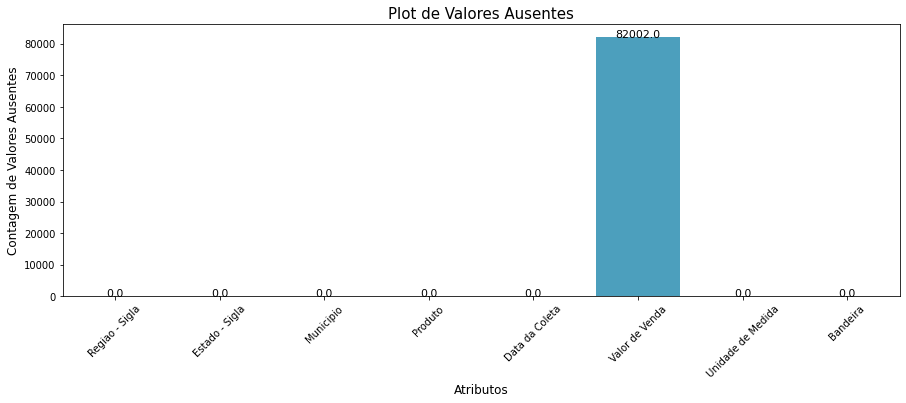

In [14]:
# Identificando Valores Ausentes

# Valores ausentes por coluna
null_df = data_glp.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize=(15,5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title('Plot de Valores Ausentes', fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

* Podemos visualizar que a Coluna **Valor de Venda**, tem valores ausentes.

* Vamos adotar o metodo de apagar as linhas com valores ausentes

In [15]:
# Apagando a linhas com valores ausentes e verificando o tamanho do DataFrame(linhas x colunas)

data_glp.dropna(inplace=True)
data_glp.shape

(164004, 8)

In [17]:
# Verificando se não a mais dados ausentes

# Verifica o percentual de valores ausentes
func_calc_percentual_valores_ausentes(data_glp)

O dataset tem 0.0 % de valores ausentes.


In [18]:
data_glp['Regiao - Sigla'].unique()

array(['S', 'SE', 'NE', 'N', 'CO'], dtype=object)

In [19]:
# Tipo dos dados das colunas
print(data_glp.dtypes)

data_glp['Valor de Venda'] = data_glp['Valor de Venda'].str.replace(',','.') # Alterando de virgula para ponto
data_glp['Valor de Venda'] = data_glp['Valor de Venda'].apply(pd.to_numeric) # Alterando o tipo da coluna 

print('-----')
print(data_glp.dtypes)

data_glp.to_csv('./data/data_glp.csv', sep=';')

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Produto              object
Data da Coleta       object
Valor de Venda       object
Unidade de Medida    object
Bandeira             object
dtype: object
-----
Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Unidade de Medida     object
Bandeira              object
dtype: object


### Verificando a Distribuição da Variável - Valor de Venda

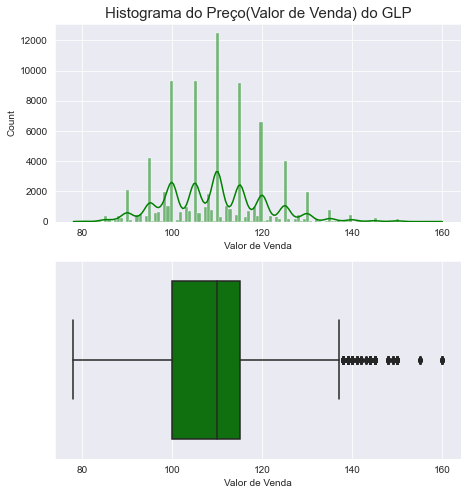

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.histplot(data_glp['Valor de Venda'], kde=True, color='green')
plt.title('Histograma do Preço(Valor de Venda) do GLP', fontsize=15)

plt.subplot(223)
sns.boxplot(data_glp['Valor de Venda'], color='green')

plt.show()

#### Agrupando os dados por região e calculando a média

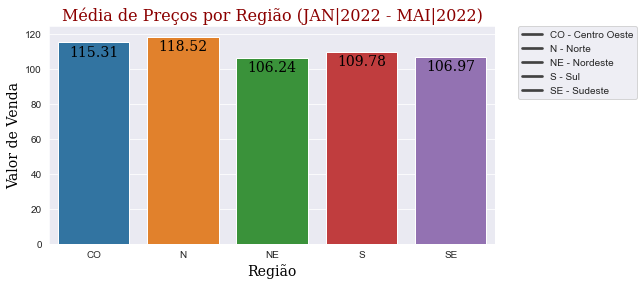

       Valor de Venda
count    82002.000000
mean       109.422908
std         11.021266
min         78.000000
25%        100.000000
50%        110.000000
75%        115.000000
max        160.000000


In [21]:
data_group_regiao = round(data_glp.groupby(['Regiao - Sigla']).mean(),2)
data_group_regiao = data_group_regiao.rename_axis('Regiao - Sigla').reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.barplot(data=data_group_regiao, x='Regiao - Sigla', y='Valor de Venda')
plt.title('Média de Preços por Região (JAN|2022 - MAI|2022)', fontdict=font_title)
plt.xlabel('Região', fontdict=font_xlabel)
plt.ylabel('Valor de Venda', fontdict=font_ylabel)
plt.legend(['CO - Centro Oeste','N - Norte','NE - Nordeste','S - Sul','SE - Sudeste'], 
                bbox_to_anchor=(1.05, 1),
                loc='upper left', 
                borderaxespad=0.)
for x,y in enumerate(data_group_regiao['Valor de Venda']):
    plt.text(x,y-8,'%s'%round(y,2),ha='center', fontdict=font_xlabel)               
plt.show()

media_preco_br = data_glp['Valor de Venda'].mean()

print(data_glp.describe())

* Média de preço do GLP de JAN-2022 | MAI-2022 -> **109.42**

* Pelo gráfico acima e pela descrição da coluna **Valor de Venda**, podemos verificar que o preço do GLP nas regiões **NE(Nordeste) e SE(Sudeste)** estão abaixo da média.

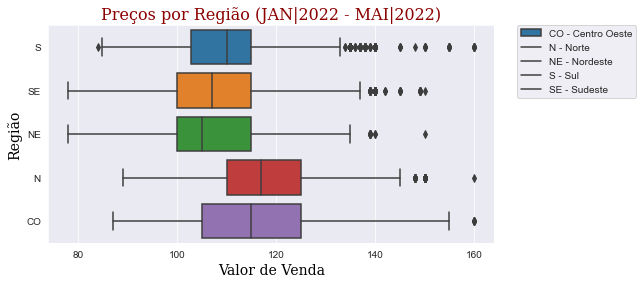

In [22]:
# Distribuição do preço de venda por região
data_regiao = data_glp[['Regiao - Sigla','Valor de Venda']]

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.boxplot(data=data_regiao, y='Regiao - Sigla', x='Valor de Venda')
plt.title('Preços por Região (JAN|2022 - MAI|2022)', fontdict=font_title)
plt.xlabel('Valor de Venda', fontdict=font_xlabel)
plt.ylabel('Região', fontdict=font_ylabel)
plt.legend(['CO - Centro Oeste','N - Norte','NE - Nordeste','S - Sul','SE - Sudeste'], 
                bbox_to_anchor=(1.05, 1),
                loc='upper left', 
                borderaxespad=0.)             
plt.show()

In [24]:
# Variação do preço de venda por região

df_reg_dat = round(data_glp.groupby(['Regiao - Sigla','Data da Coleta']).mean(),2)
df_reg_dat.reset_index(inplace=True)

# Região Sul
df_s = df_reg_dat[(df_reg_dat['Regiao - Sigla'] == 'S')]
df_s_min = data_glp[(data_glp['Regiao - Sigla'] == 'S')].min()
df_s_max = data_glp[(data_glp['Regiao - Sigla'] == 'S')].max()
df_s_diff = df_s_max[5] - df_s_min[5]
df_s_diff_2 = ((df_s_max[5] / df_s_min[5]) -1) * 100
print('--------Região SUL---------')
print('JAN|2022 - MAI|2022')
print(f'O menor preço de venda registrado foi de: R${df_s_min[5]:.2f}, no dia {df_s_min[4]}')
print(f'O maior preço de venda registrado foi de: R${df_s_max[5]:.2f}, no dia {df_s_max[4]}')
print(f'Um aumento de R${df_s_diff:.2f} - {df_s_diff_2:.2f}%')
print(f'O ùltimo preço de venda coletado foi de: R${df_s.iloc[-1][2]}, no dia: {df_s.iloc[-1][1]}')
print('---------------------------')

# Região Sudeste
df_se = df_reg_dat[(df_reg_dat['Regiao - Sigla'] == 'SE')]
df_se_min = data_glp[(data_glp['Regiao - Sigla'] == 'SE')].min()
df_se_max = data_glp[(data_glp['Regiao - Sigla'] == 'SE')].max()
df_se_diff = df_se_max[5] - df_se_min[5]
df_se_diff_2 = ((df_se_max[5] / df_se_min[5]) -1) * 100
print('------Região SUDESTE-------')
print('JAN|2022 - MAI|2022')
print(f'O menor preço de venda registrado foi de: R${df_se_min[5]:.2f}, no dia {df_se_min[4]}')
print(f'O maior preço de venda registrado foi de: R${df_se_max[5]:.2f}, no dia {df_se_max[4]}')
print(f'Um aumento de R${df_se_diff:.2f} - {df_se_diff_2:.2f}%')
print(f'O ùltimo preço de venda coletado foi de: R${df_se.iloc[-1][2]}, no dia: {df_se.iloc[-1][1]}')
print('---------------------------')

# Região Centro-Oeste
df_co = df_reg_dat[(df_reg_dat['Regiao - Sigla'] == 'CO')]
df_co_min = data_glp[(data_glp['Regiao - Sigla'] == 'CO')].min()
df_co_max = data_glp[(data_glp['Regiao - Sigla'] == 'CO')].max()
df_co_diff = df_co_max[5] - df_co_min[5]
df_co_diff_2 = ((df_co_max[5] / df_co_min[5]) -1) * 100
print('----Região CENTRO OESTE----')
print('JAN|2022 - MAI|2022')
print(f'O menor preço de venda registrado foi de: R${df_co_min[5]:.2f}, no dia {df_co_min[4]}')
print(f'O maior preço de venda registrado foi de: R${df_co_max[5]:.2f}, no dia {df_co_max[4]}')
print(f'Um aumento de R${df_co_diff:.2f} - {df_co_diff_2:.2f}%')
print(f'O ùltimo preço de venda coletado foi de: R${df_co.iloc[-1][2]}, no dia: {df_co.iloc[-1][1]}')
print('---------------------------')

# Região Norte
df_no = df_reg_dat[(df_reg_dat['Regiao - Sigla'] == 'N')]
df_no_min = data_glp[(data_glp['Regiao - Sigla'] == 'N')].min()
df_no_max = data_glp[(data_glp['Regiao - Sigla'] == 'N')].max()
df_no_diff = df_no_max[5] - df_no_min[5]
df_no_diff_2 = ((df_no_max[5] / df_no_min[5]) -1) * 100
print('-------Região NORTE--------')
print('JAN|2022 - MAI|2022')
print(f'O menor preço de venda registrado foi de: R${df_no_min[5]:.2f}, no dia {df_no_min[4]}')
print(f'O maior preço de venda registrado foi de: R${df_no_max[5]:.2f}, no dia {df_no_max[4]}')
print(f'Um aumento de R${df_no_diff:.2f} - {df_no_diff_2:.2f}%')
print(f'O ùltimo preço de venda coletado foi de: R${df_no.iloc[-1][2]}, no dia: {df_no.iloc[-1][1]}')
print('---------------------------')

# Região Nordeste
df_nod = df_reg_dat[(df_reg_dat['Regiao - Sigla'] == 'NE')]
df_nod_min = data_glp[(data_glp['Regiao - Sigla'] == 'NE')].min()
df_nod_max = data_glp[(data_glp['Regiao - Sigla'] == 'NE')].max()
df_nod_diff = df_nod_max[5] - df_nod_min[5]
df_nod_diff_2 = ((df_nod_max[5] / df_nod_min[5]) -1) * 100
print('----Região CENTRO OESTE----')
print('JAN|2022 - MAI|2022')
print(f'O menor preço de venda registrado foi de: R${df_nod_min[5]:.2f}, no dia {df_nod_min[4]}')
print(f'O maior preço de venda registrado foi de: R${df_nod_max[5]:.2f}, no dia {df_nod_max[4]}')
print(f'Um aumento de R${df_nod_diff:.2f} - {df_nod_diff_2:.2f}%')
print(f'O ùltimo preço de venda codletado foi de: R${df_nod.iloc[-1][2]}, no dia: {df_nod.iloc[-1][1]}')
print('---------------------------')



--------Região SUL---------
JAN|2022 - MAI|202
O menor preço de venda registrado foi de: R$84.00, no dia 01/02/2022
O maior preço de venda registrado foi de: R$160.00, no dia 31/05/2022
Um aumento de R$76.00 - 90.48%
O ùltimo preço de venda coletado foi de: R$113.73, no dia: 31/05/2022
---------------------------
------Região SUDESTE-------
JAN|2022 - MAI|202
O menor preço de venda registrado foi de: R$78.00, no dia 01/02/2022
O maior preço de venda registrado foi de: R$150.00, no dia 31/05/2022
Um aumento de R$72.00 - 92.31%
O ùltimo preço de venda coletado foi de: R$110.85, no dia: 31/05/2022
---------------------------
----Região CENTRO OESTE----
JAN|2022 - MAI|202
O menor preço de venda registrado foi de: R$86.99, no dia 01/02/2022
O maior preço de venda registrado foi de: R$160.00, no dia 31/05/2022
Um aumento de R$73.01 - 83.93%
O ùltimo preço de venda coletado foi de: R$118.58, no dia: 31/05/2022
---------------------------
-------Região NORTE--------
JAN|2022 - MAI|202
O menor 

* De acordo com o relatório informado acima podemos verificar que o menor valor de venda registrado foi na região **SUL e CENTRO OESTE** (R$78,00), e o maior foram nas regiões **SUL, CENTRO OESTE e NORTE** (R$160,00).